Analysis

Based on the latitude versus temperature graph, warmer temperatures are seen closer to the equator which is near zero degrees 
latitude.

Windspeed also tends to be lower near the equator as well.

There is also a higher percentage of humidity near the equator.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import pandas as pd
from config import api_key
from citipy import citipy

In [2]:
#generate random coordinates to use for cities list
rand_coordinates = [( np.random.uniform(-90,90 ), np.random.uniform(-180,180) ) for k in range(1400)]

In [3]:
cities = []
for coordinate_pair in rand_coordinates:
    lat, long = coordinate_pair
    cities.append(citipy.nearest_city(lat, long))
    

In [4]:
cities_list=[]
for city in cities:
    country_code = city.country_code
    name = city.city_name
    cities_list.append(name)
    

In [5]:
actual_cities_list=[]
for city in cities_list:
    if city not in actual_cities_list:
        actual_cities_list.append(city)

In [6]:
# Get current weather

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="



In [7]:
# set up lists to hold reponse info
city_name=[]
lat = []
temperature=[]
cloudiness=[]
windspeed=[]
humidity=[]
count=1
for city in actual_cities_list:
    print(f"Processing Record number {count} | {city}")
    print(query_url + str(city))
    count+=1
    
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

    
    

Processing Record number 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=da9c1ba49a05e30c0a69745575bd9f4f&units=imperial&q=qaanaaq
Processing Record number 2 | east london
http://api.openweathermap.org/data/2.5/weather?appid=da9c1ba49a05e30c0a69745575bd9f4f&units=imperial&q=east london
Processing Record number 3 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=da9c1ba49a05e30c0a69745575bd9f4f&units=imperial&q=sinnamary
Processing Record number 4 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=da9c1ba49a05e30c0a69745575bd9f4f&units=imperial&q=klaksvik
Processing Record number 5 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=da9c1ba49a05e30c0a69745575bd9f4f&units=imperial&q=norman wells
Processing Record number 6 | roros
http://api.openweathermap.org/data/2.5/weather?appid=da9c1ba49a05e30c0a69745575bd9f4f&units=imperial&q=roros
Processing Record number 7 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=da

In [8]:
# Loop through the list of cities and perform a request for data on each
for n in actual_cities_list:
    response = requests.get(query_url + str(n)).json()
    try:
        lat.append(response['coord']['lat'])
    except:
        continue
    city_name.append(response['name'])
    temperature.append(response['main']['temp'])
    windspeed.append(response['wind']['speed'])
    cloudiness.append(response['clouds']['all'])
    humidity.append(response['main']['humidity'])

In [9]:
data_df=pd.DataFrame({"City":city_name,
                      "Latitude":lat,
                      "Temperature":temperature,
                      "Cloudiness":cloudiness,
                      "Windspeed":windspeed,
                      "Humidity":humidity,
                      })
data_df.head()

,City,Cloudiness,Humidity,Latitude,Temperature,Windspeed
0,Qaanaaq,24,88,77.48,-14.98,4.29
1,East London,40,78,-33.02,71.60,16.11
2,Sinnamary,76,94,5.38,79.93,12.39
3,Klaksvik,92,100,62.23,32.00,16.11
4,Norman Wells,20,83,65.28,-7.61,3.36


In [10]:
exported_data=data_df.to_csv('WeatherData.csv')

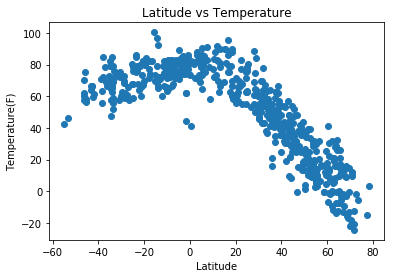

In [11]:
#Latitude vs Temperature scatter plot
x_axis=data_df["Latitude"]
y_axis=data_df["Temperature"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Latitude vs Temperature")
plt.savefig('LatitudevsTemp')
plt.show()

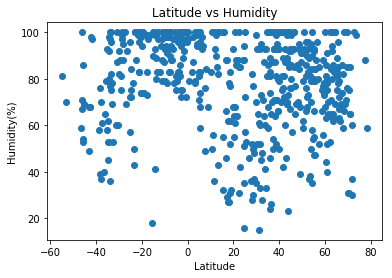

In [12]:
#Latitude vs Humidity
x_axis=data_df["Latitude"]
y_axis=data_df["Humidity"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Latitude vs Humidity")
plt.savefig("LatitudevsHumidity")
plt.show()

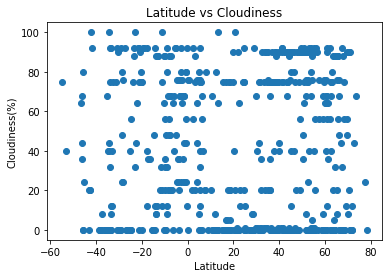

In [13]:
#Latitude vs Cloudiness
x_axis=data_df["Latitude"]
y_axis=data_df["Cloudiness"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Latitude vs Cloudiness")
plt.savefig("LatitudevsCloudiness")
plt.show()

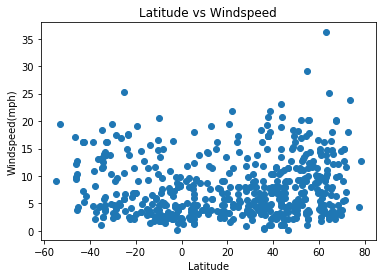

In [14]:
#Latitude vs Wind Speed
x_axis=data_df["Latitude"]
y_axis=data_df["Windspeed"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
plt.title("Latitude vs Windspeed")
plt.savefig("LatitudevsWindspeed")
plt.show()